# Machine Learning project for predicting BTC price
- dataset -> kaggle.com

In [1]:
# imports

import pandas as pd
import numpy as np
import joblib
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Reading CSV file and getting basic info about the dataframe

In [2]:
# read csv

df = pd.read_csv(r'data/data.csv')

In [3]:
df.head(5)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,1609459200000,28923.63,28961.66,28913.12,28961.66,27.457032,1609459259999,7.943820e+05,1292,16.777195,485390.826825
1,1609459260000,28961.67,29017.50,28961.01,29009.91,58.477501,1609459319999,1.695803e+06,1651,33.733818,978176.468202
2,1609459320000,29009.54,29016.71,28973.58,28989.30,42.470329,1609459379999,1.231359e+06,986,13.247444,384076.854453
3,1609459380000,28989.68,28999.85,28972.33,28982.69,30.360677,1609459439999,8.800168e+05,959,9.456028,274083.075142
4,1609459440000,28982.67,28995.93,28971.80,28975.65,24.124339,1609459499999,6.992262e+05,726,6.814644,197519.374888


In [4]:
df.shape

(188317, 11)

In [5]:
df.dtypes

Open Time                         int64
Open                            float64
High                            float64
Low                             float64
Close                           float64
Volume                          float64
Close Time                        int64
Quote asset volume              float64
Number of trades                  int64
Taker buy base asset volume     float64
Taker buy quote asset volume    float64
dtype: object

### Working with data

In [6]:
# converting unix time to a datetime

df['Open Time'] = pd.to_datetime(df['Open Time'], unit = 'ms')
df['Close Time'] = pd.to_datetime(df['Close Time'], unit = 'ms')

# dropping rows of the same day

df['Open Time'] = df['Open Time'].dt.date

# dropping additional data

df.drop_duplicates(subset= ['Open Time'], inplace = True)
df.drop(columns = ['Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume'], inplace = True)
df.drop_duplicates(subset = ['Open Time'])

# create a var for desired days to predict

days_to_predict = 25

df['prediction'] = df[['Open']].shift(-days_to_predict)





df.rename(columns = {'Open Time': 'Open Date',
                    'Open': 'Open Price $', 
                    'High': 'High Price $',
                    'Low': 'Low Price $',
                    'Close': 'Close Price $',
                    'prediction': 'Open Prediction $'}, inplace = True)

# creating another column for €

df['Open Prediction €'] = df['Open Prediction $'] * 0.94

df.reset_index(drop = True,inplace = True)

In [7]:
df.head()

,Open Date,Open Price $,High Price $,Low Price $,Close Price $,Volume,Close Time,Open Prediction $,Open Prediction €
0,2021-01-01,28923.63,28961.66,28913.12,28961.66,27.457032,2021-01-01 00:00:59.999,32254.19,30318.9386
1,2021-01-02,29331.70,29331.70,29295.22,29305.41,77.512264,2021-01-02 00:00:59.999,32464.01,30516.1694
2,2021-01-03,32176.45,32250.00,32165.00,32216.22,101.804992,2021-01-03 00:00:59.999,30362.19,28540.4586
3,2021-01-04,33000.05,33075.64,32999.98,33066.23,142.734643,2021-01-04 00:00:59.999,33368.18,31366.0892
4,2021-01-05,31989.75,32104.06,31989.74,32100.01,194.791099,2021-01-05 00:00:59.999,34246.28,32191.5032


### Setting up a model

In [8]:
# creating another dataset -> X (independent)

X = np.array(df[['Open Price $']])
X = X [: -days_to_predict]

In [9]:
# creating another dataset -> y (dependent)

y = np.array(df[['Open Prediction $']])

y = y[: -days_to_predict]

In [10]:
# splitting data 80 % training 20% testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [11]:
# model set up

model = LinearRegression()

model.fit(X_train, y_train)

joblib.dump(model, 'btc_model.joblib')

['btc_model.joblib']

### Testing, predicting the result and creating a new dataset

In [12]:
# testing 

score = model.score(X_test, y_test)

print(f'Score of your model is : {score}')

Score of your model is : 0.5379826442197404


In [13]:
x_days_to_predict = np.array(df[['Open Price $']])[-days_to_predict:]
time_graph_data = np.array([str(df.iloc[df.shape[0] - x - 1]['Open Date']) for x in range(days_to_predict)])

time_graph_data = time_graph_data[::-1]

In [14]:
# predicting

final_prediction = model.predict(x_days_to_predict)
final_prediction = np.round(final_prediction, 2)

print(f'The prediction for the next {days_to_predict} days is: ')
for index, item in enumerate(final_prediction):
    print(f'day {time_graph_data[index]}: {item[0]} $')

The prediction for the next 25 days is: 
day 2021-04-18: 58823.61 $
day 2021-04-19: 56745.75 $
day 2021-04-20: 56467.28 $
day 2021-04-21: 56893.91 $
day 2021-04-22: 55472.96 $
day 2021-04-23: 54343.34 $
day 2021-04-24: 54030.64 $
day 2021-04-25: 53458.08 $
day 2021-04-26: 52929.5 $
day 2021-04-27: 55588.13 $
day 2021-04-28: 56132.61 $
day 2021-04-29: 56043.31 $
day 2021-04-30: 55347.63 $
day 2021-05-01: 57579.36 $
day 2021-05-02: 57633.29 $
day 2021-05-03: 56976.45 $
day 2021-05-04: 57294.96 $
day 2021-05-05: 55159.09 $
day 2021-05-06: 57438.67 $
day 2021-05-07: 56877.03 $
day 2021-05-08: 57373.68 $
day 2021-05-09: 58209.34 $
day 2021-05-10: 57872.23 $
day 2021-05-11: 56565.87 $
day 2021-05-12: 57025.92 $


In [15]:
# creating a new dataset

new_df = pd.DataFrame(columns = ['Open Date', 'Open Price $', 'Open Predicted Price $'])
graph_data = [x[0] for x in final_prediction]


new_df['Open Date'] = time_graph_data
new_df['Open Price $'] = x_days_to_predict
new_df['Open Predicted Price $'] = graph_data

# exporting to csv

new_df.to_csv(r'data/BTC_predicted.csv', index = False)

### Visualising result

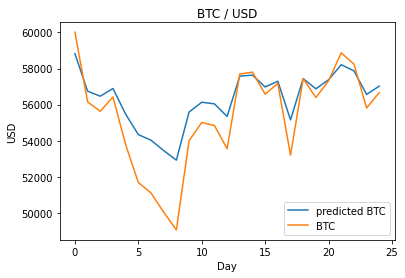

In [16]:
# arrayas 

days = np.array([x for x in range(days_to_predict)])


# graph settings 

plt.plot(days, graph_data)
plt.title('BTC / USD')
plt.xlabel('Day')
plt.ylabel('USD')
plt.plot(days, x_days_to_predict)
plt.legend(['predicted BTC', 'BTC'])

plt.show()